In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
q5 = pd.read_csv('../exports/q5.csv')
q7 = pd.read_csv('../exports/q7.csv')
q2 = pd.read_csv('../exports/q2.csv')
q1 = pd.read_csv('../exports/q1.csv')
q9 = pd.read_csv('../exports/q9.csv')

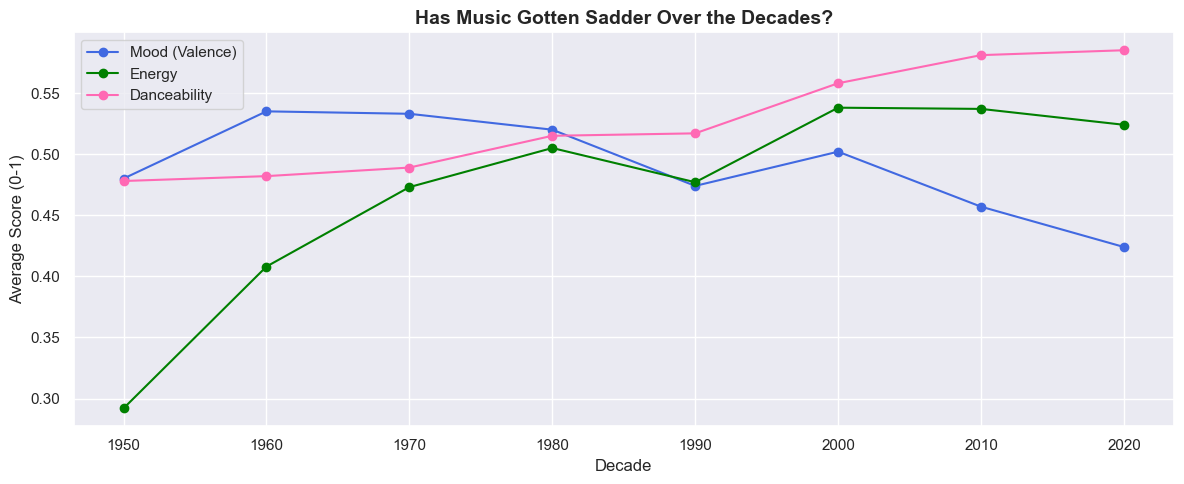

In [10]:
sns.set_theme(style='darkgrid')

# Filter out early decades with tiny sample sizes
q5_filtered = q5[q5['Track_Count'] > 1000]

plt.figure(figsize=(12, 5))
plt.plot(q5_filtered['Decade'], q5_filtered['AVG_Mood'], marker='o', color='#4169E1', label='Mood (Valence)')
plt.plot(q5_filtered['Decade'], q5_filtered['AVG_Energy'], marker='o', color='#008000', label='Energy')
plt.plot(q5_filtered['Decade'], q5_filtered['AVG_Danceability'], marker='o', color='#FF69B4', label='Danceability')

plt.title('Has Music Gotten Sadder Over the Decades?', fontsize=14, fontweight='bold')
plt.xlabel('Decade')
plt.ylabel('Average Score (0-1)')
plt.xticks(q5_filtered['Decade'])
plt.legend()
plt.tight_layout()
plt.savefig('../data/cleaned/mood_by_decade.png', dpi=150, bbox_inches='tight')
plt.show()

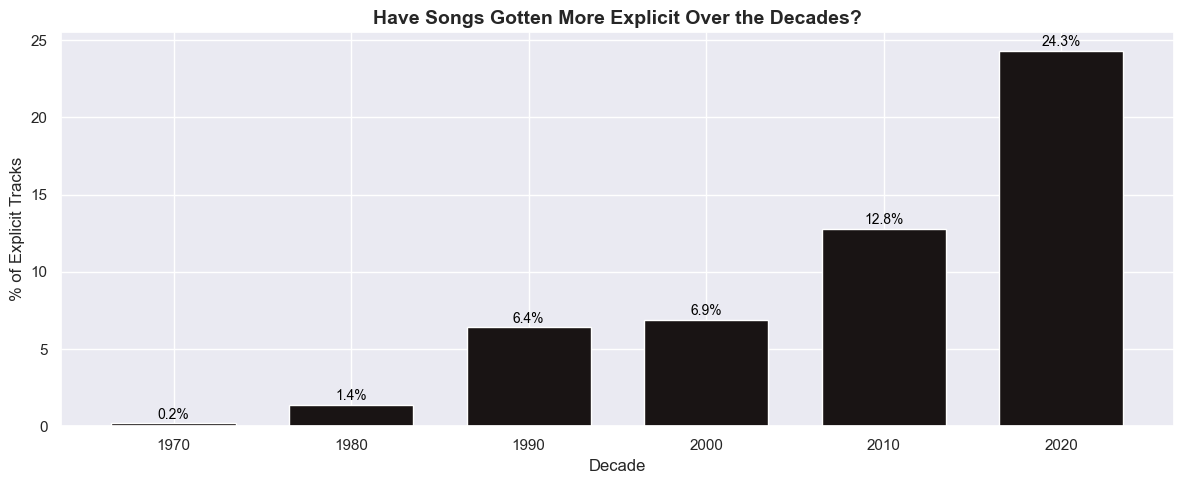

In [6]:
# Calculate explicit percentage per decade
q7_pct = q7.copy()
q7_total = q7.groupby('Decade')['Track_Count'].sum().reset_index()
q7_total.columns = ['Decade', 'Total']
q7_explicit = q7[q7['Explicity'] == 1][['Decade', 'Track_Count']].copy()
q7_merged = q7_explicit.merge(q7_total, on='Decade')
q7_merged['Explicit_Pct'] = (q7_merged['Track_Count'] / q7_merged['Total'] * 100).round(1)
q7_merged = q7_merged[q7_merged['Total'] > 1000]

plt.figure(figsize=(12, 5))
bars = plt.bar(q7_merged['Decade'], q7_merged['Explicit_Pct'], color='#191414', width=7)

# Add percentage labels on bars
for bar, pct in zip(bars, q7_merged['Explicit_Pct']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{pct}%', ha='center', fontsize=10, color='black')

plt.title('Have Songs Gotten More Explicit Over the Decades?', fontsize=14, fontweight='bold')
plt.xlabel('Decade')
plt.ylabel('% of Explicit Tracks')
plt.xticks(q7_merged['Decade'])
plt.tight_layout()
plt.savefig('../data/cleaned/explicit_by_decade.png', dpi=150, bbox_inches='tight')
plt.show()

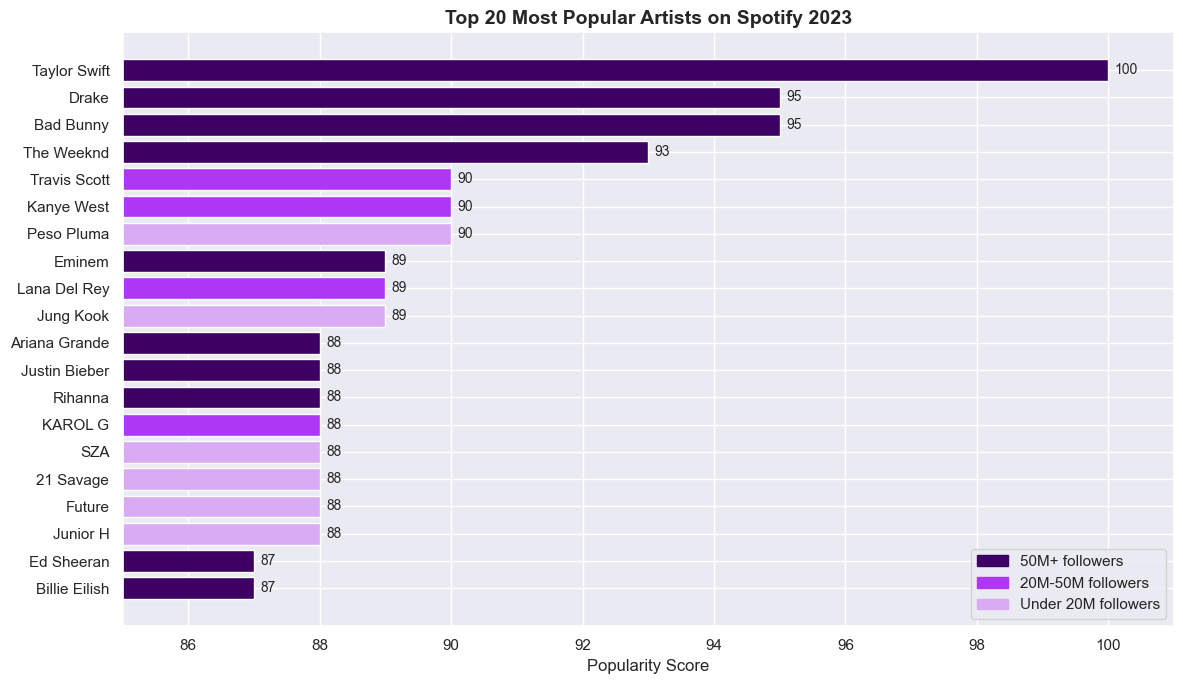

In [15]:
plt.figure(figsize=(12, 7))
colors = ['#3D0063' if f > 50000000 else '#AE36F5' if f > 20000000 else '#D9ABF5' 
          for f in q2['Followers']]

bars = plt.barh(q2['Name'][::-1], q2['Popularity_Score'][::-1], color=colors[::-1])

plt.title('Top 20 Most Popular Artists on Spotify 2023', fontsize=14, fontweight='bold')
plt.xlabel('Popularity Score')
plt.xlim(85, 101)

# Add score labels
for bar, score in zip(bars, q2['Popularity_Score'][::-1]):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             str(score), va='center', fontsize=10)

# Add legend
from matplotlib.patches import Patch
legend = [Patch(color='#3D0063', label='50M+ followers'),
          Patch(color='#AE36F5', label='20M-50M followers'),
          Patch(color='#D9ABF5', label='Under 20M followers')]
plt.legend(handles=legend, loc='lower right')

plt.tight_layout()
plt.savefig('../data/cleaned/top_artists.png', dpi=150, bbox_inches='tight')
plt.show()

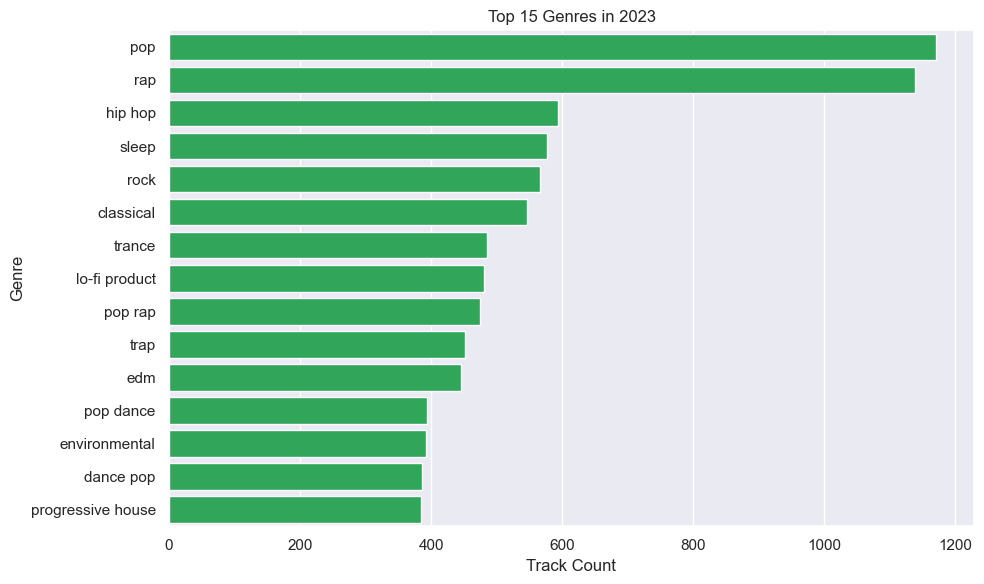

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=q1, x='Track_Count', y='Genre', color='#1DB954')
plt.title('Top 15 Genres in 2023')
plt.xlabel('Track Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('../data/cleaned/genres_2023.png', dpi=150, bbox_inches='tight')
plt.show()

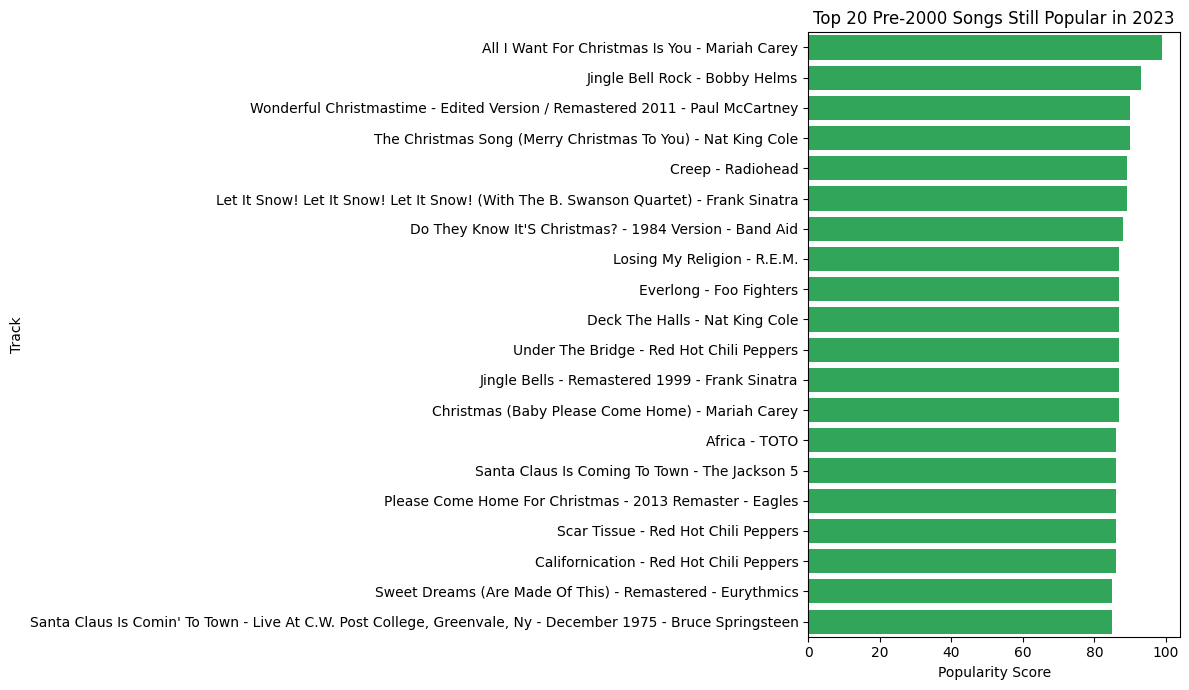

In [5]:
q9['track_label'] = q9['track_name'] + ' - ' + q9['name']

plt.figure(figsize=(12, 7))
sns.barplot(data=q9, x='track_popularity', y='track_label', color='#1DB954')
plt.title('Top 20 Pre-2000 Songs Still Popular in 2023')
plt.xlabel('Popularity Score')
plt.ylabel('Track')
plt.tight_layout()
plt.savefig('../data/cleaned/old_songs_2023.png', dpi=150, bbox_inches='tight')
plt.show()